In [1]:
pip list

Package                       Version
----------------------------- -------------------
alabaster                     0.7.12
anyio                         3.3.4
argon2-cffi                   21.1.0
async-generator               1.10
attrs                         21.2.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
beautifulsoup4                4.10.0
bleach                        4.1.0
brotlipy                      0.7.0
certifi                       2021.10.8
cffi                          1.15.0
cftime                        1.5.1.1
chardet                       4.0.0
charset-normalizer            2.0.0
click                         7.1.2
click-completion              0.5.2
click-log                     0.3.2
click-plugins                 1.1.1
cligj                         0.7.1
cloudpickle                   1.6.0
colorama                      0.4.4
cryptography                  35.0.0
cycler                        0.10.0



sphinxcontrib-applehelp       1.0.2
sphinxcontrib-bibtex          2.2.1
sphinxcontrib-devhelp         1.0.2
sphinxcontrib-htmlhelp        2.0.0
sphinxcontrib-jsmath          1.0.1
sphinxcontrib-qthelp          1.0.3
sphinxcontrib-serializinghtml 1.1.5
spyder-kernels                1.10.2
SQLAlchemy                    1.4.26
terminado                     0.12.1
testpath                      0.5.0
toml                          0.10.2
tornado                       6.1
traitlets                     5.0.5
typing-extensions             3.10.0.2
uc-micro-py                   1.0.1
urllib3                       1.26.7
wcwidth                       0.2.5
webencodings                  0.5.1
websocket-client              0.57.0
wheel                         0.36.2
widgetsnbextension            3.5.2
win-inet-pton                 1.1.0
wincertstore                  0.2
zipp                          3.6.0


In [2]:
import netCDF4 as nc
from obspy.io.segy.segy import _read_segy
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
#Specific module to plot the graph in the Jupyter Notebook
%matplotlib inline 

In [3]:
f=nc.Dataset('E:/UKPDC/JupyterExample/GRADES_IMAGE_G06.nc', 'r')

In [4]:
print(f.ncattrs())

['title', 'summary', 'history', 'keywords', 'Conventions', 'standard_name_vocabulary', 'acknowlegement', 'institution', 'license', 'location', 'instrument', 'platform', 'source', 'time_coverage_start', 'time_coverage_end', 'flight', 'campaign', 'creator_name', 'geospatial_lat_min', 'geospatial_lat_max', 'geospatial_lon_min', 'geospatial_lon_max', 'radar_parameters', 'antenna', 'digitiser', 'processing', 'resolution', 'GPS', 'projection', 'references', 'metadata_link', 'related_datasets', 'publisher_name', 'publisher_type', 'publisher_email', 'publisher_link', 'comment']


In [5]:
print(f)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: Processed airborne radio-echo sounding data from the GRADES-IMAGE survey covering the Evans and Rutford Ice Streams, and ice rises in the Ronne Ice Shelf, West Antarctica (2006/2007)
    summary: An airborne radar survey was flown as part of the GRADES-IMAGE project funded by BAS over the Antarctic Peninsula, Ellsworth Mountains and Filchner-Ronne Ice Shelf 
    (also including the Evans Ice stream and Carson Inlet) mainly to image englacial layers and bedrock topography during the 2006/07 field season.
    Operating from temporary field camps at Sky Blu, Partiot Hills and out of RABID depot (Rutford Ice Stream), we collected ~27,550 km of airborne radio-echo sounding data over 100 hours of surveying.
    Our aircraft was equipped with dual-frequency carrier-phase GPS for navigation, radar altimeter for surface mapping, wing-tip magnetometers, and a new ice-sounding radar system (PASIN). 
 

In [6]:
print(f.dimensions.keys())

dict_keys(['traces', 'fast_time'])


In [7]:
for dim in f.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'>: name = 'traces', size = 5584
<class 'netCDF4._netCDF4.Dimension'>: name = 'fast_time', size = 1400


In [8]:
print(f.variables.keys())

dict_keys(['traces', 'fast_time', 'x_coordinates', 'y_coordinates', 'chirp_data', 'pulse_data', 'longitude_layerData', 'latitude_layerData', 'UTC_time_layerData', 'PriNumber_layerData', 'terrainClearanceAircraft_layerData', 'aircraft_altitude_layerData', 'surface_altitude_layerData', 'surface_pick_layerData', 'bed_altitude_layerData', 'bed_pick_layerData', 'land_ice_thickness_layerData'])


In [9]:
for var in f.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
int32 traces(traces)
    long_name: Trace number for the radar data (x axis)
    short_name: traceNum
unlimited dimensions: 
current shape = (5584,)
filling off
<class 'netCDF4._netCDF4.Variable'>
float32 fast_time(fast_time)
    long_name: Two-way travel time (y axis)
    standard_name: time
    units: microseconds
unlimited dimensions: 
current shape = (1400,)
filling off
<class 'netCDF4._netCDF4.Variable'>
float64 x_coordinates(traces)
    long_name: Cartesian x-coordinates (WGS84 EPSG:3031) for the radar data
    standard_name: projection_x_coordinate
    units: m
unlimited dimensions: 
current shape = (5584,)
filling off
<class 'netCDF4._netCDF4.Variable'>
float64 y_coordinates(traces)
    long_name: Cartesian y-coordinates (WGS84 EPSG:3031) for the radar data
    standard_name: projection_y_coordinate
    units: m
unlimited dimensions: 
current shape = (5584,)
filling off
<class 'netCDF4._netCDF4.Variable'>
float32 chirp_data(fast_time, traces)

In [10]:
x_nc = f.variables['x_coordinates'][:].data # read in x positions array
y_nc = f.variables['y_coordinates'][:].data # read in y positions array
x_nc_km = np.divide(x_nc,1000) # transform to kms
y_nc_km = np.divide(y_nc,1000) # transform to kms
chirpData = f.variables['chirp_data'][:].data # read in radar data array
pulseData = f.variables['pulse_data'][:].data # read in radar data array

#traces_pulse_nc = f.variables['traces_pulse'][:].data # read in trace number (x axis)
#fast_time_nc = f.variables['fast_time'][:].data # read in fast time (y axis)

surf_pick = f.variables['surface_pick_layerData'][:].data # read in surface positions array
surf_pick[surf_pick == -9999] = 'nan'
bed_pick = f.variables['bed_pick_layerData'][:].data # read in bed positions array
bed_pick[bed_pick == -9999] = 'nan'


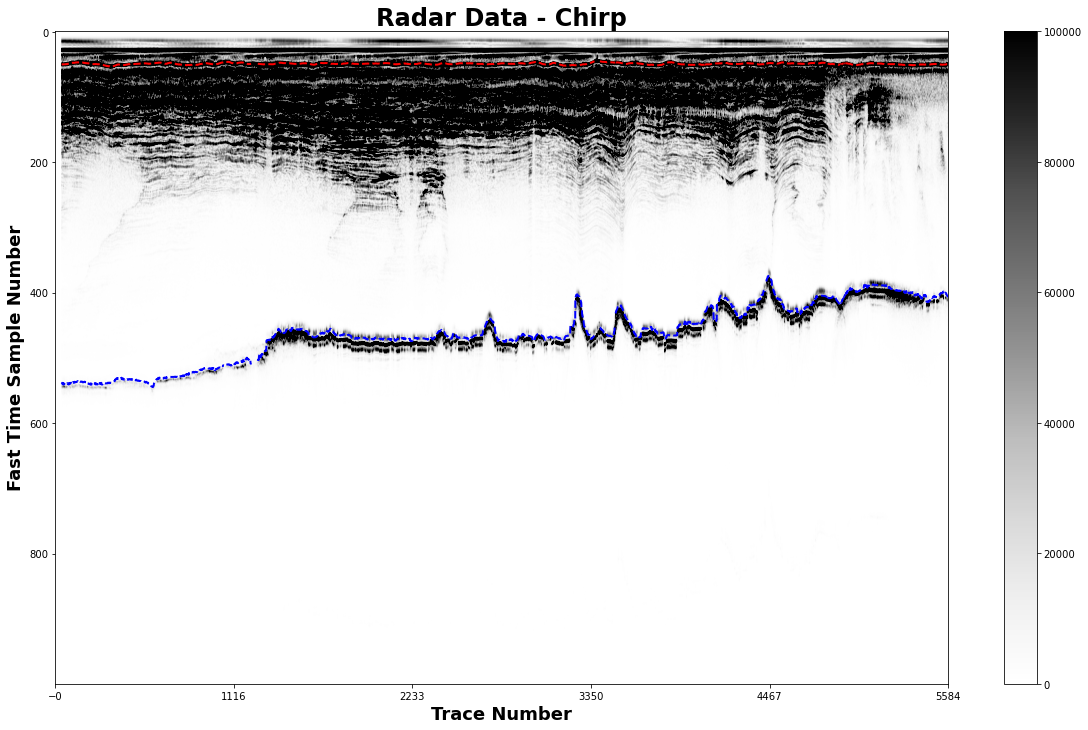

In [11]:
# Sets the size of the inline plot
plt.rcParams['figure.figsize'] = [20,12]

# Plot raw radargram
vm = np.percentile(chirpData, 99)
fig1, ax1 = plt.subplots()
raw_im = ax1.imshow(chirpData[:1000,:],cmap='Greys', vmin=0, vmax=100000, aspect='auto')
ax1.plot(surf_pick,'r--', linewidth=2) # '-10' prevents figure axes from extending too much
ax1.plot(bed_pick, 'b--', linewidth=2) # '-10' prevents figure axes from extending too much
ax1.xaxis.set_major_locator(ticker.LinearLocator(6))

ax1.set_title("Radar Data - Chirp", fontsize = 24, fontweight = 'bold')
ax1.set_xlabel("Trace Number", fontsize = 18, fontweight = 'bold')
ax1.set_ylabel("Fast Time Sample Number", fontsize = 18, fontweight = 'bold')
fig1.colorbar(raw_im, ax = ax1)

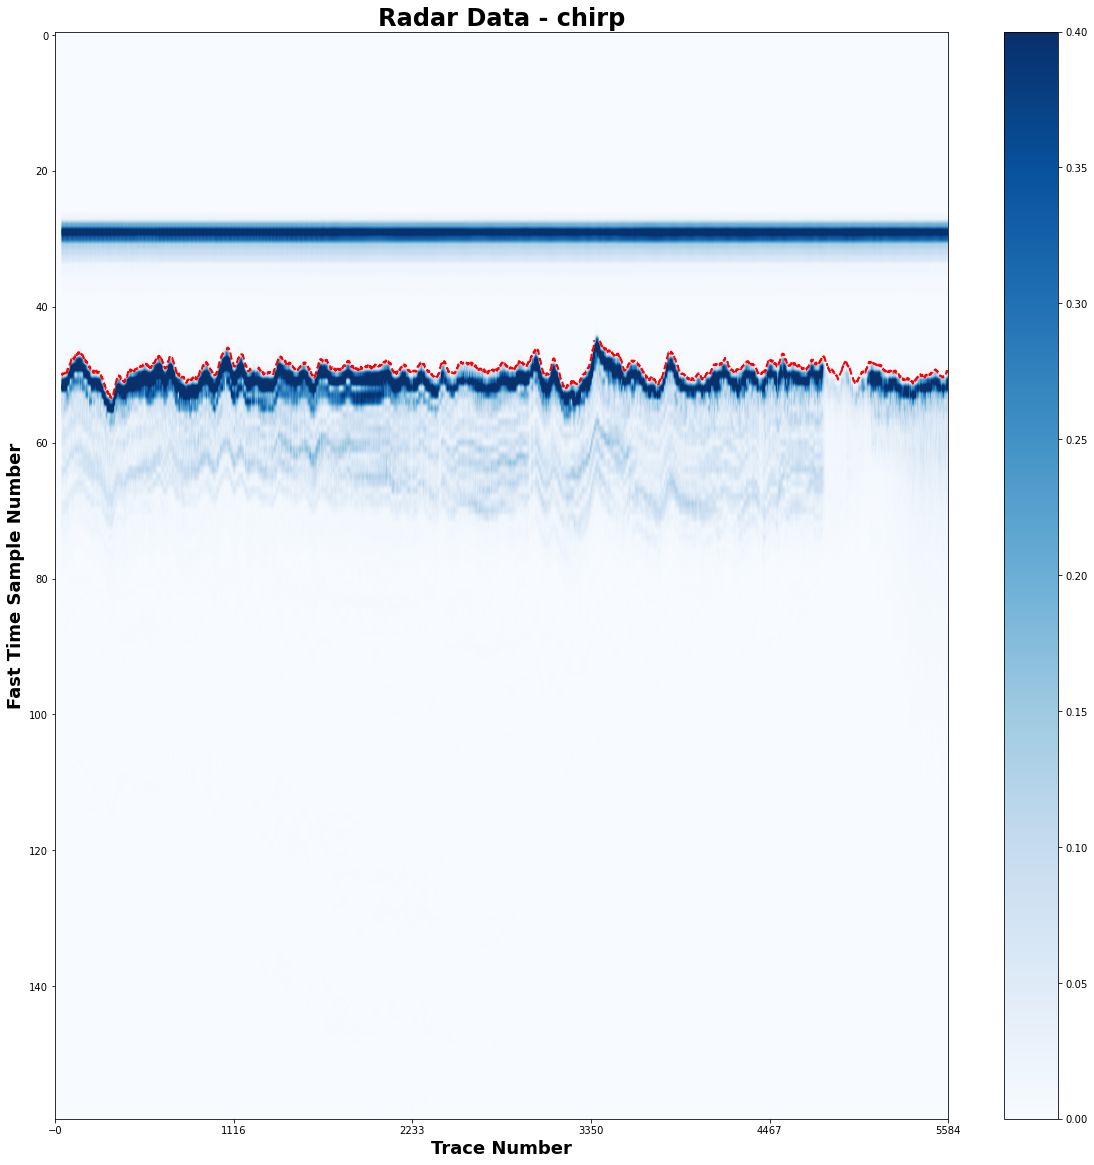

In [12]:
# Sets the size of the inline plot
plt.rcParams['figure.figsize'] = [20,20]

# Plot raw radargram
fig2, ax2 = plt.subplots()
raw_im = ax2.imshow(pulseData[:160,:], cmap = plt.cm.Blues,  vmin=0, vmax=0.4, aspect='auto')
ax2.plot(surf_pick,'r--', linewidth=2) # '-10' prevents figure axes from extending too much
#ax1.plot(bed_pick, 'b--', linewidth=1) # '-10' prevents figure axes from extending too much
ax2.xaxis.set_major_locator(ticker.LinearLocator(6))

ax2.set_title("Radar Data - chirp", fontsize = 24, fontweight = 'bold')
ax2.set_xlabel("Trace Number", fontsize = 18, fontweight = 'bold')
ax2.set_ylabel("Fast Time Sample Number", fontsize = 18, fontweight = 'bold')
fig2.colorbar(raw_im, ax = ax2)

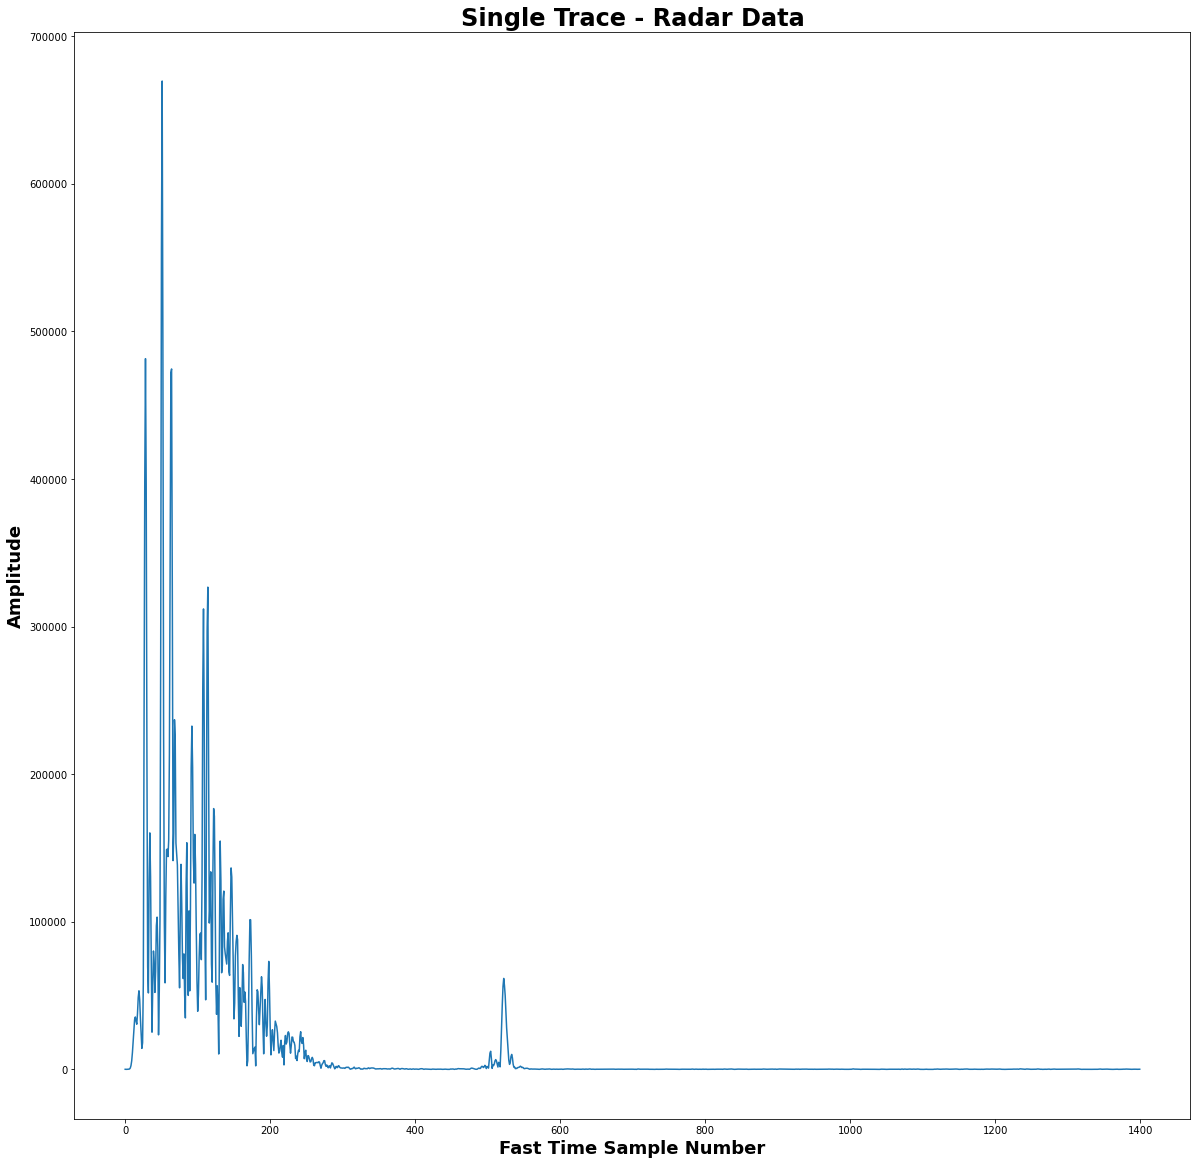

In [13]:
# Plot a single trace from the raw radargram 

plt.plot(chirpData[:,1000])
plt.xlabel('Fast Time Sample Number', fontsize = 18, fontweight = 'bold')
plt.ylabel('Amplitude', fontsize = 18, fontweight = 'bold')
plt.title('Single Trace - Radar Data', fontsize = 24, fontweight = 'bold')
plt.show()

In [14]:
segy_data_pusle = 'E:/UKPDC/JupyterExample/G06_pulse.segy'
segy_data_chirp = 'E:/UKPDC/JupyterExample/G06_chirp.segy'

In [15]:
segy_pulse = _read_segy(segy_data_pusle, headonly=True)
segy_chirp = _read_segy(segy_data_chirp, headonly=True)

In [16]:
segy_pulse
segy_chirp

5584 traces in the SEG Y structure.

In [17]:
header_pulse = segy_pulse.binary_file_header
header_pulse

Binary File Header:
	job_identification_number: 0
	line_number: 0
	reel_number: 0
	number_of_data_traces_per_ensemble: 0
	number_of_auxiliary_traces_per_ensemble: 0
	sample_interval_in_microseconds: 1000
	sample_interval_in_microseconds_of_original_field_recording: 0
	number_of_samples_per_data_trace: 1400
	number_of_samples_per_data_trace_for_original_field_recording: 0
	data_sample_format_code: 5
	ensemble_fold: 0
	trace_sorting_code: 0
	vertical_sum_code: 0
	sweep_frequency_at_start: 0
	sweep_frequency_at_end: 0
	sweep_length: 0
	sweep_type_code: 0
	trace_number_of_sweep_channel: 0
	sweep_trace_taper_length_in_ms_at_start: 0
	sweep_trace_taper_length_in_ms_at_end: 0
	taper_type: 0
	correlated_data_traces: 0
	binary_gain_recovered: 0
	amplitude_recovery_method: 0
	measurement_system: 1
	impulse_signal_polarity: 0
	vibratory_polarity_code: 0
	unassigned_1: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [18]:
header_chirp = segy_chirp.binary_file_header
header_chirp

Binary File Header:
	job_identification_number: 0
	line_number: 0
	reel_number: 0
	number_of_data_traces_per_ensemble: 0
	number_of_auxiliary_traces_per_ensemble: 0
	sample_interval_in_microseconds: 1000
	sample_interval_in_microseconds_of_original_field_recording: 0
	number_of_samples_per_data_trace: 1400
	number_of_samples_per_data_trace_for_original_field_recording: 0
	data_sample_format_code: 5
	ensemble_fold: 0
	trace_sorting_code: 0
	vertical_sum_code: 0
	sweep_frequency_at_start: 0
	sweep_frequency_at_end: 0
	sweep_length: 0
	sweep_type_code: 0
	trace_number_of_sweep_channel: 0
	sweep_trace_taper_length_in_ms_at_start: 0
	sweep_trace_taper_length_in_ms_at_end: 0
	taper_type: 0
	correlated_data_traces: 0
	binary_gain_recovered: 0
	amplitude_recovery_method: 0
	measurement_system: 1
	impulse_signal_polarity: 0
	vibratory_polarity_code: 0
	unassigned_1: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [19]:
traces_pulse = segy_pulse.traces
traces_chirp = segy_chirp.traces

In [20]:
trace_header_pulse = traces_pulse[1].header
trace_header_pulse

trace_sequence_number_within_line: 2
trace_sequence_number_within_segy_file: 2
original_field_record_number: 1185400
trace_number_within_the_original_field_record: 1
energy_source_point_number: 2
ensemble_number: 0
trace_number_within_the_ensemble: 0
trace_identification_code: 1
number_of_vertically_summed_traces_yielding_this_trace: 0
number_of_horizontally_stacked_traces_yielding_this_trace: 1
data_use: 0
distance_from_center_of_the_source_point_to_the_center_of_the_receiver_group: 0
receiver_group_elevation: 0
surface_elevation_at_source: 0
source_depth_below_surface: 0
datum_elevation_at_receiver_group: 0
datum_elevation_at_source: 0
water_depth_at_source: 0
water_depth_at_group: 0
scalar_to_be_applied_to_all_elevations_and_depths: 0
scalar_to_be_applied_to_all_coordinates: 0
source_coordinate_x: -1270327
source_coordinate_y: 140859
group_coordinate_x: 0
group_coordinate_y: 0
coordinate_units: 0
weathering_velocity: 0
subweathering_velocity: 0
uphole_time_at_source_in_ms: 0
uphole_

In [21]:
trace_header_chirp = traces_chirp[1].header
trace_header_chirp

trace_sequence_number_within_line: 2
trace_sequence_number_within_segy_file: 2
original_field_record_number: 1185400
trace_number_within_the_original_field_record: 1
energy_source_point_number: 2
ensemble_number: 0
trace_number_within_the_ensemble: 0
trace_identification_code: 1
number_of_vertically_summed_traces_yielding_this_trace: 0
number_of_horizontally_stacked_traces_yielding_this_trace: 1
data_use: 0
distance_from_center_of_the_source_point_to_the_center_of_the_receiver_group: 0
receiver_group_elevation: 0
surface_elevation_at_source: 0
source_depth_below_surface: 0
datum_elevation_at_receiver_group: 0
datum_elevation_at_source: 0
water_depth_at_source: 0
water_depth_at_group: 0
scalar_to_be_applied_to_all_elevations_and_depths: 0
scalar_to_be_applied_to_all_coordinates: 0
source_coordinate_x: -1270327
source_coordinate_y: 140859
group_coordinate_x: 0
group_coordinate_y: 0
coordinate_units: 0
weathering_velocity: 0
subweathering_velocity: 0
uphole_time_at_source_in_ms: 0
uphole_

In [22]:
sgy_traces_len_pulse = len(segy_pulse.traces)
sgy_traces_len_pulse

5584

In [23]:
sgy_traces_len_chirp = len(segy_chirp.traces)
sgy_traces_len_chirp

5584

In [24]:
sgy_samples_len_pulse = traces_pulse[1].header.number_of_samples_in_this_trace
sgy_samples_len_pulse

1400

In [25]:
sgy_samples_len_chirp = traces_chirp[1].header.number_of_samples_in_this_trace
sgy_samples_len_chirp

1400

In [26]:
one_trace_pulse = traces_pulse[0]
data_pulse = np.stack(t.data for t in segy_pulse.traces)
vm = np.percentile(data_pulse, 99)

#fig = plt.figure()
#plt.rcParams["figure.figsize"] = (10,10)
#plt.plot(one_trace_pulse.data)
#plt.title("SEGY quicklook SEGY data - pulse")

C:\Users\almand\Anaconda3\envs\JupyterBook_env\lib\site-packages\IPython\core\interactiveshell.py:3361: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [27]:
#one_trace_chirp = traces_chirp[0]
data_chirp = np.stack(t.data for t in segy_chirp.traces)
vm = np.percentile(data_chirp, 99)

#fig = plt.figure()
#plt.rcParams["figure.figsize"] = (20,20)
#plt.plot(one_trace_chirp.data)
#plt.title("SEGY quicklook SEGY data")

(100.0, 0.0)

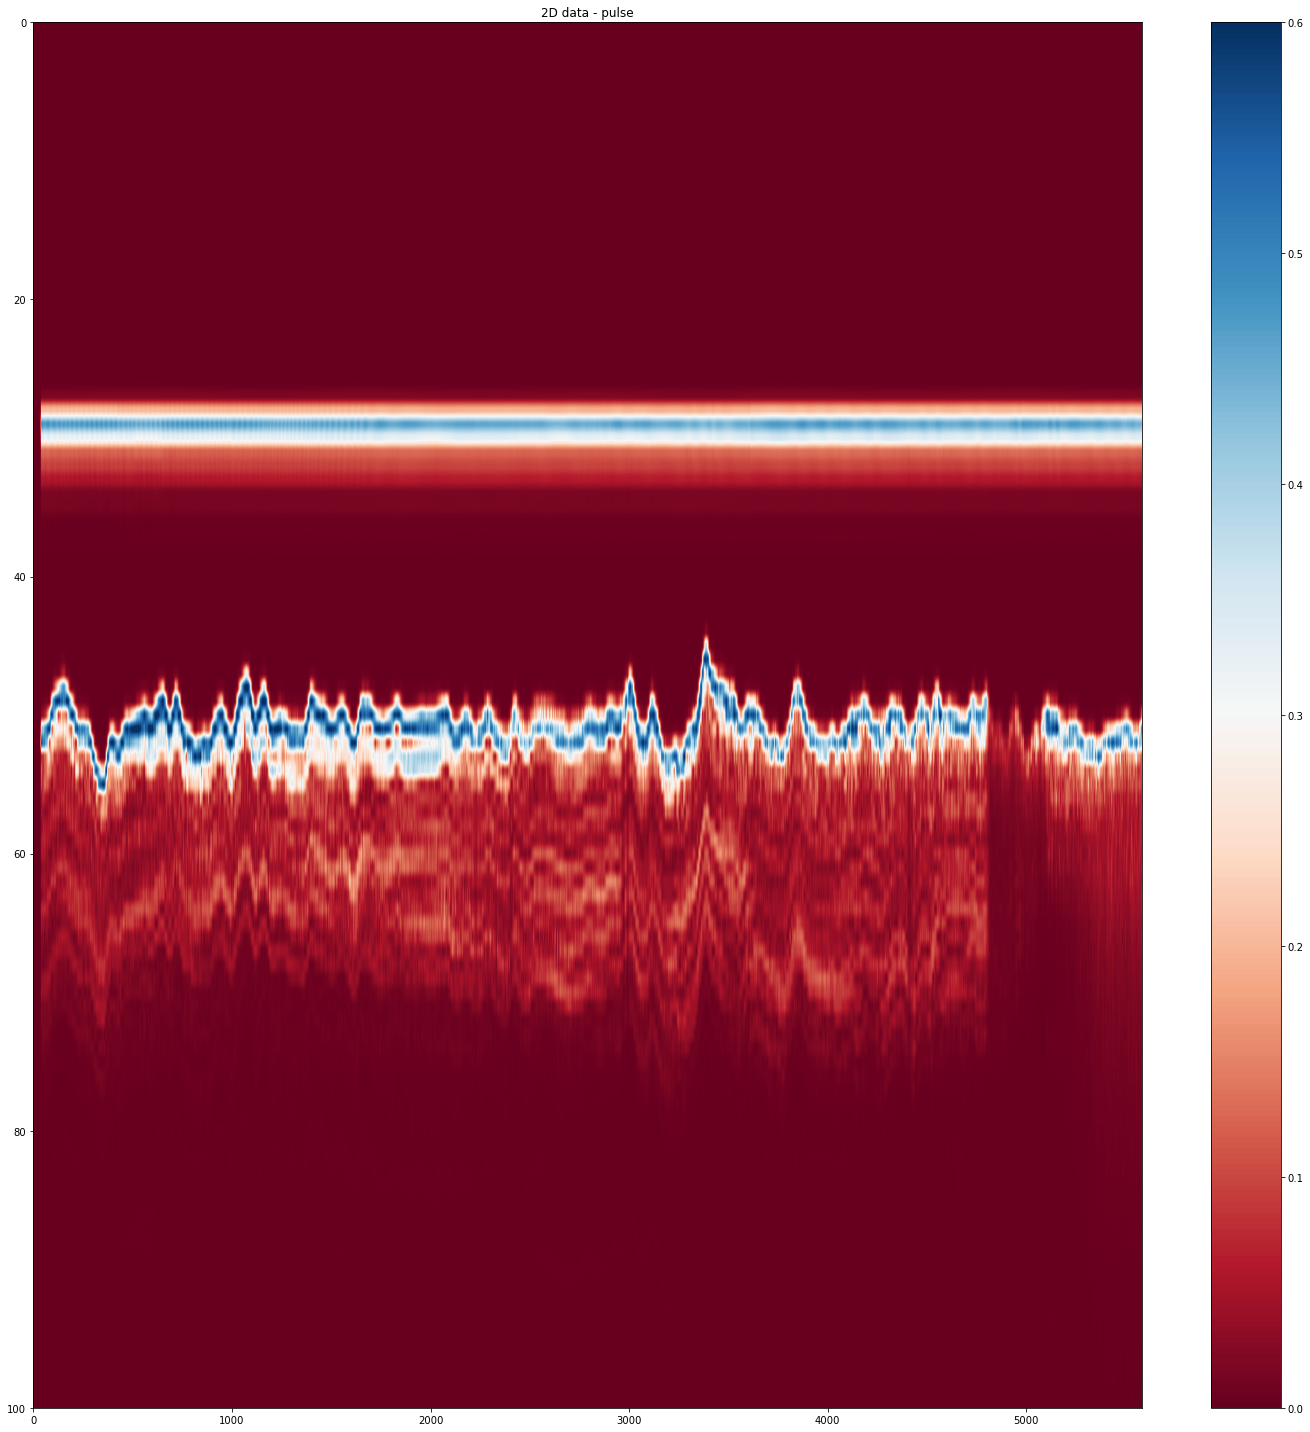

In [28]:
plt.imshow(data_pulse.T, cmap="RdBu", vmin=0, vmax=0.6, aspect='auto')
plt.title('2D data - pulse')
plt.colorbar()
plt.rcParams["figure.figsize"] = (20,20)
plt.tight_layout()
plt.ylim([100,0])

(800.0, 0.0)

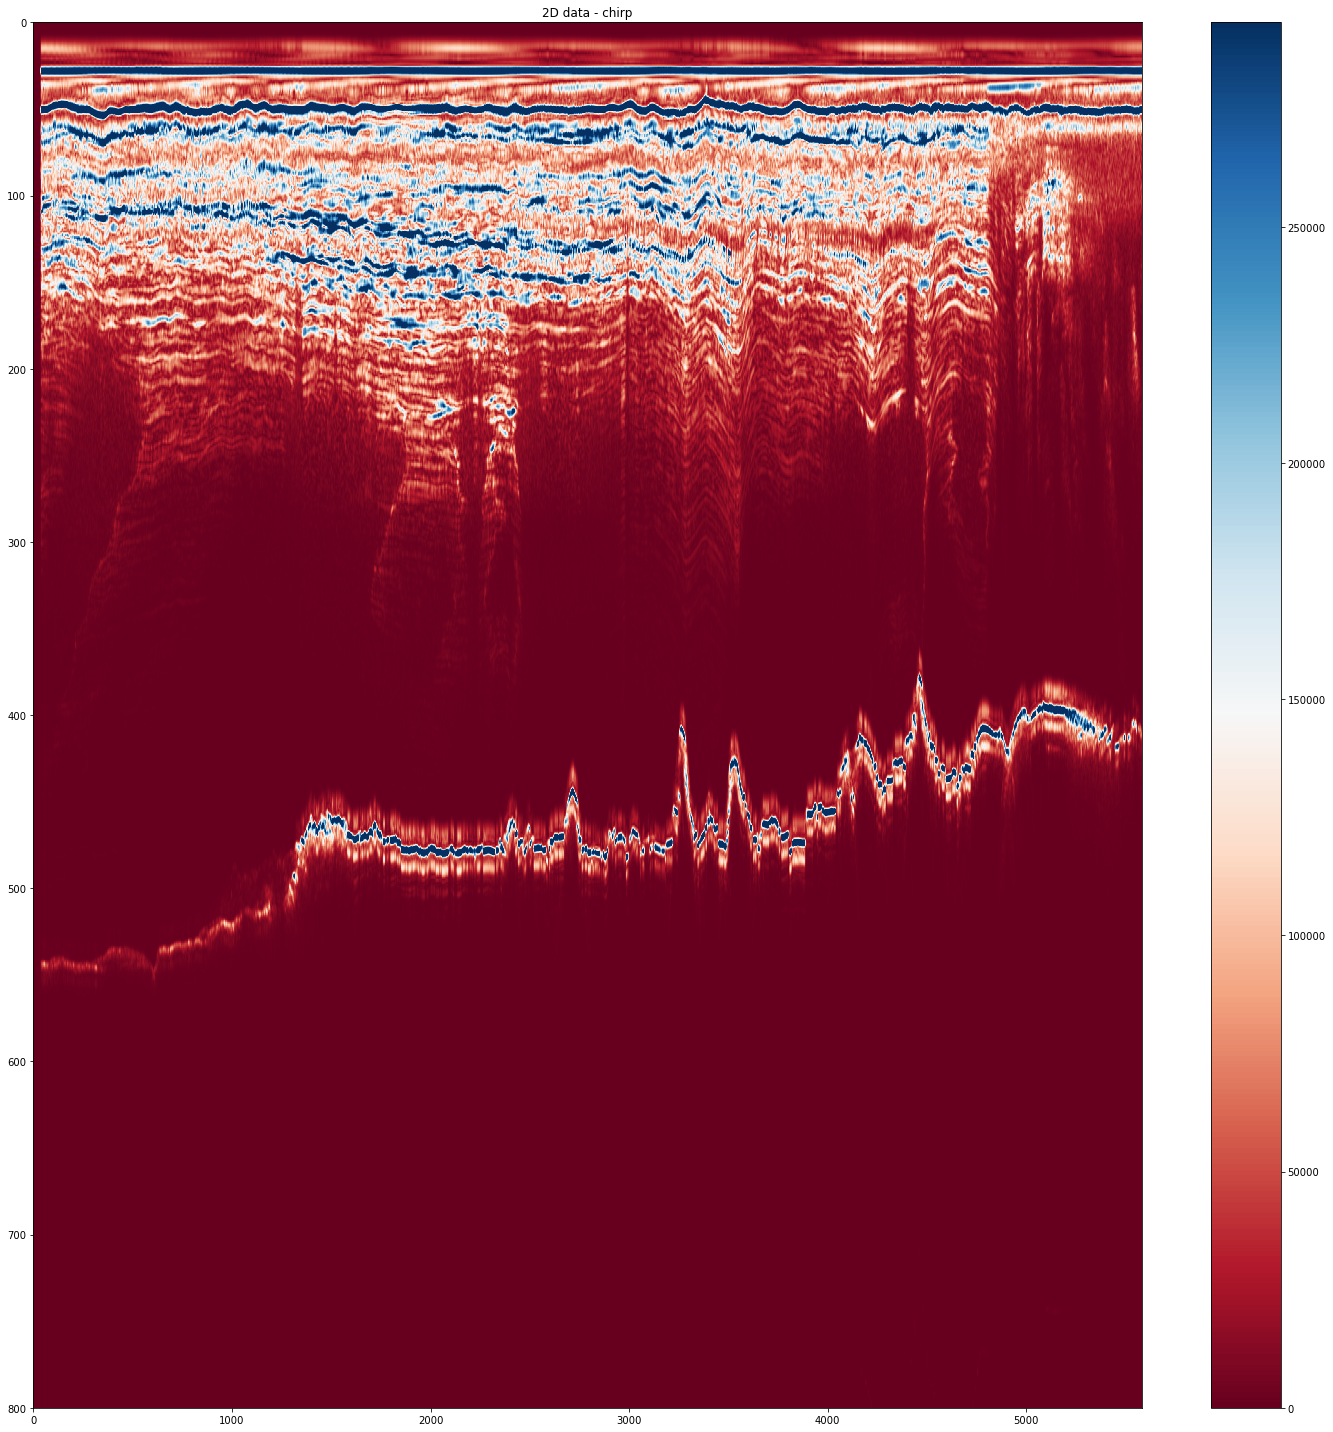

In [29]:
plt.imshow(data_chirp.T, cmap="RdBu", vmin=0, vmax=vm, aspect='auto')
plt.title('2D data - chirp')
plt.colorbar()
plt.rcParams["figure.figsize"] = (20,20)
plt.tight_layout()
plt.ylim([800,0])